# LDA Topic Modeling for Reviews

## Andy Karr 

## 0. Introduction

This report investigates 12,415 reviews taken from 2017-2021 and segments them into topics using LDA Topic Modeling. 

The purpose of this investigation is to find 3 to 7 topics (the best number of topics will be statistically investigated), to highlight what those topics are and to segment new data into these topics.

## 1. Data Prep

### 1.1 Load libraries

In [69]:
#load libraries
import nltk
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1.2 Glance at the data

In [2]:
import pandas as pd
df = pd.read_csv('data/final_df.csv')
#print(df.to_string())
df.head()

feedback_created_at                           final_msg_join  \
0  2017-11-10 08:00:18                                      top   
1  2017-11-10 08:51:40               blinker defect break delay   
2  2017-11-10 08:43:30                          app really well   
3  2017-11-10 09:51:10  ending ride first attempt start app try   
4  2017-11-10 10:04:59   battery keep change level dramatically   

                                    feedback_message  
0                                                Top  
1                 blinker defect, break work delayed  
2                      App did not work really well   
3  Ending ride didn’t work at first attempt. I ha...  
4     Battery kept changing its level dramatically.

### 1.3 Prep and clean

In [70]:
df['Date']= pd.to_datetime(df['feedback_created_at'])
df['final_msg_join'] = df['final_msg_join'].astype(str)
df['year'] = pd.DatetimeIndex(df['Date']).year

from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords


tfidf_text = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
vectors_text = tfidf_text.fit_transform(df['final_msg_join'])
vectors_text.shape


C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\T430\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(12414, 993)

### 1.4 Frequency of reviews for each year

<AxesSubplot:xlabel='year'>

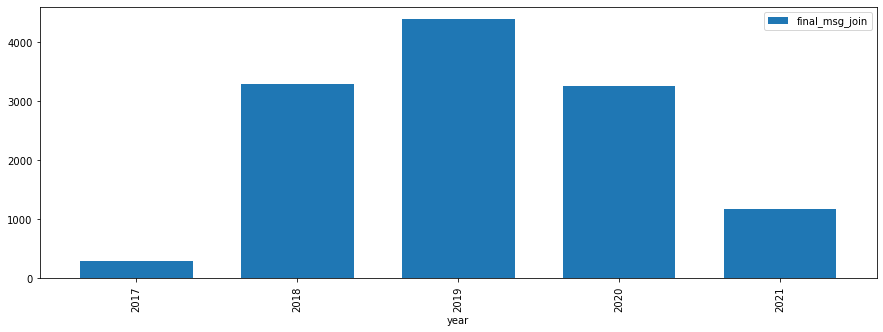

In [7]:
%matplotlib inline
df.groupby('year').agg({'final_msg_join': 'count'}).plot.bar(figsize=(15,5),width=0.7)

## 2. LDA Analysis

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5,
                        max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(df["final_msg_join"])

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 7, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

### 2.3 How many topics needed? WARNING: this takes long to run.

In [ ]:
# create tokenized documents
# gensim_paragraphs = [[w for w in re.findall(r'\b\w\w+\b' , paragraph.lower())if w not in stopwords] for paragraph in df["final_msg_join"]]
# from gensim.corpora import Dictionary
# dict_gensim_para = Dictionary(gensim_paragraphs)
# dict_gensim_para.filter_extremes(no_below=5, no_above=0.7)
# bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) \
#                     for paragraph in gensim_paragraphs]
# from gensim.models import TfidfModel
# tfidf_gensim_para = TfidfModel(bow_gensim_para)
# vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]
# from gensim.models import LdaModel
# lda_gensim_para = LdaModel(corpus=bow_gensim_para, id2word=dict_gensim_para,
#     chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=10, 
#     passes=20, eval_every=None, random_state=42)

# from gensim.models.coherencemodel import CoherenceModel

# lda_gensim_para_coherence = CoherenceModel(model=lda_gensim_para,
#     texts=gensim_paragraphs, dictionary=dict_gensim_para, coherence='c_v')
# lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence()
# from gensim.models.ldamulticore import LdaMulticore
# lda_para_model_n = []
# for n in range(3, 8):
#     lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
#     lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,dictionary=dict_gensim_para, coherence='c_v')
#     lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))
# pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))


Highest coherence score is at 7 topics, suggesting 7 topics are best to use.

### 2.4 Top 5 contributing words to each topic 

In [12]:
def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]],
                word_vector[largest[i]]*100.0/total))
display_topics(lda_para_model, count_para_vectorizer.get_feature_names())


Topic 00
  battery (17.69)
  helmet (10.86)
  break (5.02)
  low (4.07)
  perfect (4.02)

Topic 01
  moto (6.16)
  bike (3.98)
  indicator (2.92)
  dirty (2.59)
  head (2.55)

Topic 02
  scooter (13.72)
  start (4.28)
  ride (3.93)
  minute (3.75)
  app (3.16)

Topic 03
  helmet (15.70)
  open (12.03)
  case (7.40)
  close (4.44)
  box (4.06)

Topic 04
  break (10.56)
  good (5.89)
  stop (4.11)
  turn (3.70)
  light (3.51)

Topic 05
  mirror (9.90)
  loose (4.45)
  left (4.07)
  thank (3.87)
  fix (3.59)

Topic 06
  wheel (4.89)
  scooter (4.81)
  drive (4.19)
  noise (3.61)
  km (3.35)


### 2.5 A look at the words in each topic, and an example of a review that is correlated most with that topic (called "contribution")

In [15]:
import numpy as np
top_terms=20
TOTAL_TOPICS = 7
vocabulary = np.array(count_para_vectorizer.get_feature_names())
topic_terms = lda_para_model.components_
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]
topics = [', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics, columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, TOTAL_TOPICS+1)])
document_topics = W_lda_para_matrix
dt_df = pd.DataFrame(document_topics, columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])

pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)
max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t] == max_contrib_topics.loc[t]].index[0] for t in dominant_topics]

documents = [df['feedback_message'].loc[i] for i in document_numbers]
results_df = pd.DataFrame({'Dominant Topic': dominant_topics, 'Contribution%': contrib_perc,'Paper Num': document_numbers, 'Topic': topics_df['Terms per Topic'],'Paper Name': documents})
results_df

<ipython-input-15-82f4e5c24ec8>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Dominant Topic  Contribution%  Paper Num  \
Topic1             T1        0.91397       9834   
Topic2             T2        0.93402       3269   
Topic3             T3        0.95485       3871   
Topic4             T4        0.94951       6741   
Topic5             T5        0.92203       5845   
Topic6             T6        0.91412       4315   
Topic7             T7        0.92849       5630   

                                                                                                                                                  Topic  \
Topic1   battery, helmet, break, low, perfect, damage, miss, inside, refund, super, bad, ride, key, change, leave, condition, cool, strap, vice, smooth   
Topic2               moto, bike, indicator, dirty, head, cover, trip, leave, seat, run, want, hair, mark, easy, old, topcase, fool, clean, vehicle, wet   
Topic3                scooter, start, ride, minute, app, stop, charge, find, trip, second, bike, min, problem, lose, end, way, stand, refund, try, wait   
Topic4              helmet, open, case, close, box, great, ride, lock, clock, app, minute, button, try, trunk, small, love, able, size, money, properly   
Topic5           break, good, stop, turn, light, dangerous, bike, left, bit, ride, bad, middle, road, brake, hard, properly, check, traffic, rear, nice   
Topic6  mirror, loose, left, thank, fix, break, slow, service, leave, expensive, area, bike, gun, broken, little, amazing, great, app, parking, awesome   
Topic7     wheel, scooter, drive, noise, km, check, speed, feel, weird, flat, sound, rake, fast, tire, accelerate, dangerous, wrong, bit, safe, strange   

                                                                                                                                                                                                     Paper Name  
Topic1                                                                                                 Moto has a previous little damage, acceleration was not grate. I have picture of. Previous little damage  
Topic2           All the seats of every moto is ALWAYS WET, it’s disgusting, you need to improve this , every morning I leave the moto and all my clothes where I sat on are wet, the seats have water for days  
Topic3  Hi,  this was actually a very frustrating trip. When I arrived at the scooter, I could not unlock and start. I restarted my app twice and it didn’t work, I then restarted my phone, and finally I h...  
Topic4  Even though the locker for the helmets was properly closed, the app would keep telling me it wasn’t. I’ve spend a few minutes trying to re close it only for the app to tell me it still wasn’t clos...  
Topic5    The motorcycle is in vad shape - every time you stop the engine is turned off and you have to manipulate the brake and "gas" for it to turn on again, while everyone behind you honk. Also dangerous!  
Topic6                                           There never used to be any issues with the server. But lately the app sometimes takes a long time to connect to the server, or doesn't connect at all... Pity.  
Topic7                                                      I think there is a problem with the scooter! It steers a bit weird like it has abalance problem and also the scooters sounds different than normal.

## 3. LDA Visualization

### 3.1 Word Clouds - These are saved in your directory.
A word cloud for each topic is produced. The bigger the word the more the word contributes to the topic. A mixture of big words and smaller words mean the topics are well defined, which is the case here. Again, please check your directory to view these word clouds individually.

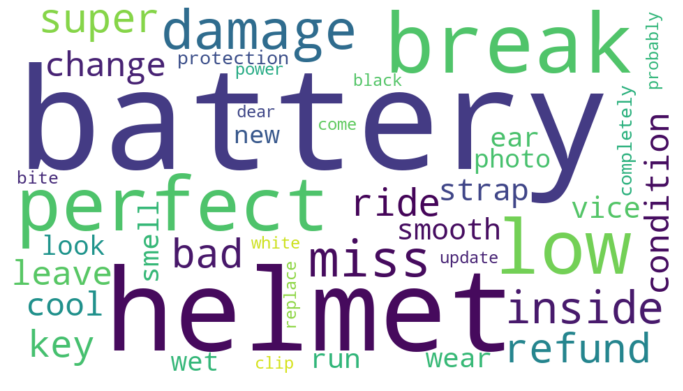

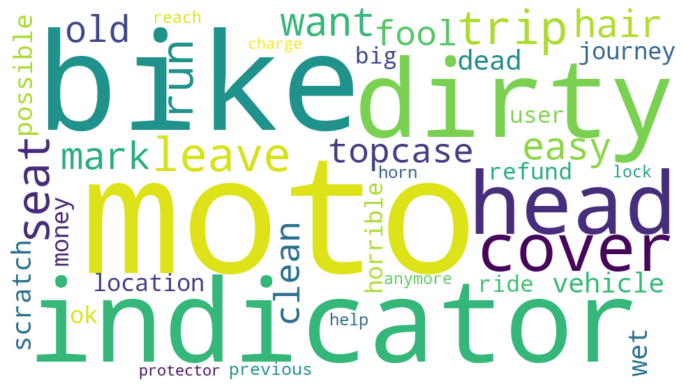

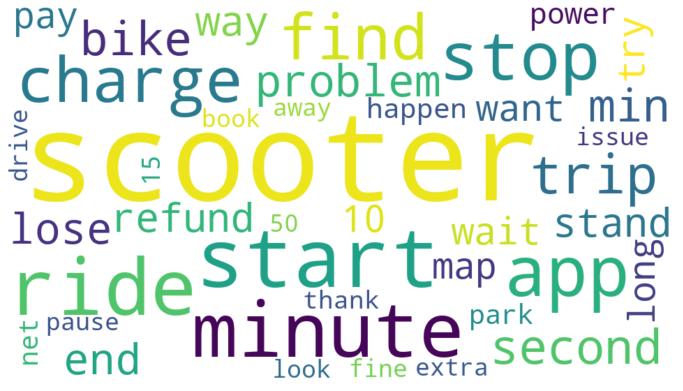

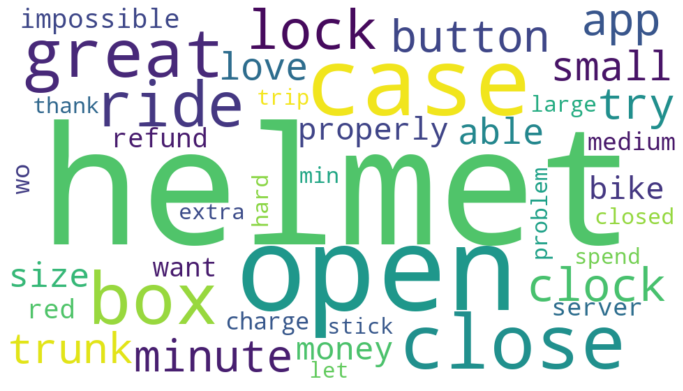

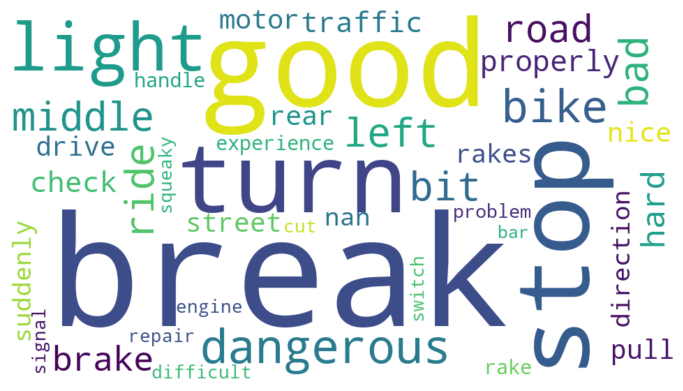

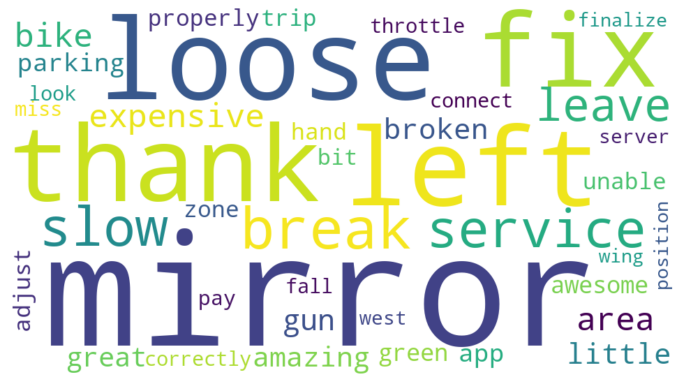

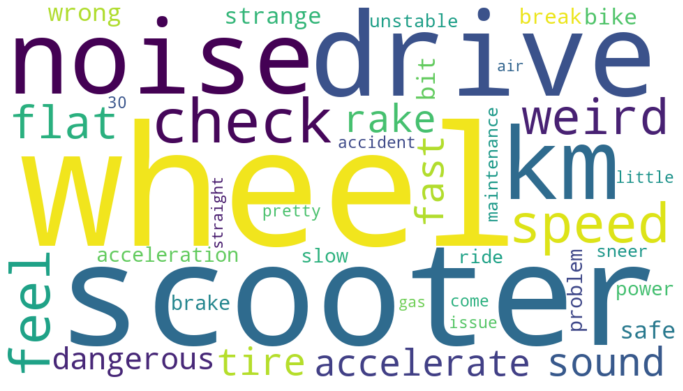

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names())

### 3.2 pyLDAvis Visualization

Size of the circle represents how many reviews in that topic. If the topics (circles) are closer, it means the topics are more related to each other. Further away means they are less related and therefore more distinct.

In [59]:
import pyLDAvis.sklearn

lda_display = pyLDAvis.sklearn.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df_sample = df.sample(n = 4)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df_sample

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


feedback_created_at  \
1303   2018-06-09 15:25:23   
1166   2018-05-22 21:41:08   
4672   2019-05-04 16:56:37   
12319  2021-05-24 12:14:49   

                                                 final_msg_join  \
1303   front wheel wobbewy back break fully vice upgrade helmet   
1166                                            lip miss helmet   
4672                                    left mirror break still   
12319                       minute finalise bike want reimburse   

                                                                                 feedback_message  \
1303   Front wheel is wobbely and the back break isnt fully working. Nice upgrade of helmets ??♥️   
1166                                                        Clip missing from one of the helmets.   
4672                                                      The left mirror was broken and still is   
12319                          It took me 5 minutes to finalise the bike! I want to be reimbursed   

                     Date  year  
1303  2018-06-09 15:25:23  2018  
1166  2018-05-22 21:41:08  2018  
4672  2019-05-04 16:56:37  2019  
12319 2021-05-24 12:14:49  2021

In [67]:
from sklearn.feature_extraction.text import CountVectorizer


#count_para_vectors = count_para_vectorizer.fit_transform(df["final_msg_join"])

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
count_para_vectorizer = CountVectorizer(stop_words=stopwords) #, min_df=2, max_df=0)
cv_new_features = count_para_vectorizer.fit_transform(df_sample["final_msg_join"])
cv_new_features.shape


topic_predictions = lda_para_model.transform(cv_new_features)
#best_topics = [[(topic, round(sc, 3)) for topic, sc in sorted(enumerate(topic_predictions[i]), key=lambda row: -row[1])[:2]] for i in range(len(topic_predictions))]
#best_topics

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: X has 16 features, but LatentDirichletAllocation is expecting 993 features as input.

### 3.3 t-SNE Clustering Chart

In [32]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_para_model[count_para_vectors]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'LatentDirichletAllocation' object is not subscriptable

In [44]:
# create tokenized documents
gensim_paragraphs = [[w for w in re.findall(r'\b\w\w+\b' , paragraph.lower())if w not in stopwords] for paragraph in df["final_msg_join"]]
#above is data_ready
from gensim.corpora import Dictionary
dict_gensim_para = Dictionary(gensim_paragraphs)
dict_gensim_para.filter_extremes(no_below=5, no_above=0.7)
bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) \
                    for paragraph in gensim_paragraphs]
from gensim.models import TfidfModel
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]
corpus = bow_gensim_para
from gensim.models import LdaModel
lda_model = LdaModel(corpus=bow_gensim_para, id2word=dict_gensim_para,
    chunksize=2000, alpha='auto', eta='auto', iterations=400, num_topics=7, 
    passes=20, eval_every=None, random_state=42)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
data_ready = gensim_paragraphs
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0         5.00000             0.23820   
1            1         5.00000             0.24520   
2            2         6.00000             0.35880   
3            3         2.00000             0.30750   
4            4         4.00000             0.40820   
5            5         2.00000             0.30750   
6            6         1.00000             0.36440   
7            7         5.00000             0.52000   
8            8         6.00000             0.28370   
9            9         4.00000             0.30850   

                                                                   Keywords  \
0          break, mirror, drive, bike, leave, left, wheel, bit, check, turn   
1          break, mirror, drive, bike, leave, left, wheel, bit, check, turn   
2          ride, app, minute, great, moto, clock, close, issue, min, charge   
3         scooter, start, slow, problem, trip, find, super, end, soto, look   
4           battery, bike, refund, km, try, want, money, low, charge, speed   
5         scooter, start, slow, problem, trip, find, super, end, soto, look   
6  stop, thank, middle, road, power, dangerous, park, flat, motorbike, area   
7          break, mirror, drive, bike, leave, left, wheel, bit, check, turn   
8          ride, app, minute, great, moto, clock, close, issue, min, charge   
9           battery, bike, refund, km, try, want, money, low, charge, speed   

                                                                       Text  
0                                                                        []  
1                                           [blinker, defect, break, delay]  
2                                                                     [app]  
3                                  [ending, ride, attempt, start, app, try]  
4                                    [battery, change, level, dramatically]  
5                               [new, update, connexion, slow, start, ride]  
6  [ending, ride, attempt, extend, area, case, de, la, zone, france, great]  
7                                              [scoot, damage, fine, drive]  
8                                                                [app, bad]  
9                                       [want, mi, credit, leave, new, app]

In [50]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Num  Topic_Perc_Contrib  \
0    0.00000             0.61690   
1    1.00000             0.71760   
2    2.00000             0.71200   
3    3.00000             0.76170   
4    4.00000             0.72440   
5    5.00000             0.83430   
6    6.00000             0.74910   

                                                                    Keywords  \
0  good, bad, love, accelerate, engine, head, new, condition, service, cover   
1   stop, thank, middle, road, power, dangerous, park, flat, motorbike, area   
2          scooter, start, slow, problem, trip, find, super, end, soto, look   
3           helmet, open, case, box, close, lock, button, trunk, small, miss   
4            battery, bike, refund, km, try, want, money, low, charge, speed   
5           break, mirror, drive, bike, leave, left, wheel, bit, check, turn   
6           ride, app, minute, great, moto, clock, close, issue, min, charge   

                                                                                   Representative Text  
0                                                                             [new, head, cover, hair]  
1  [daniel, parking, ticket, rest, handlebar, pick, mark, official, place, parking, parking, ticket...  
2  [super, good, preparation, feature, accurate, answer, user, mainly, approve, feeling, extended, ...  
3                                                  [helmet, smell, sweat, white, hair, net, available]  
4                                                               [slowly, maximum, speed, 28, buy, mal]  
5                   [giovanni, definitely, bit, check, brake, candle, loose, feel, bit, wobbly, drive]  
6                                                  [40, second, finalize, ride, charge, extra, minute]

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


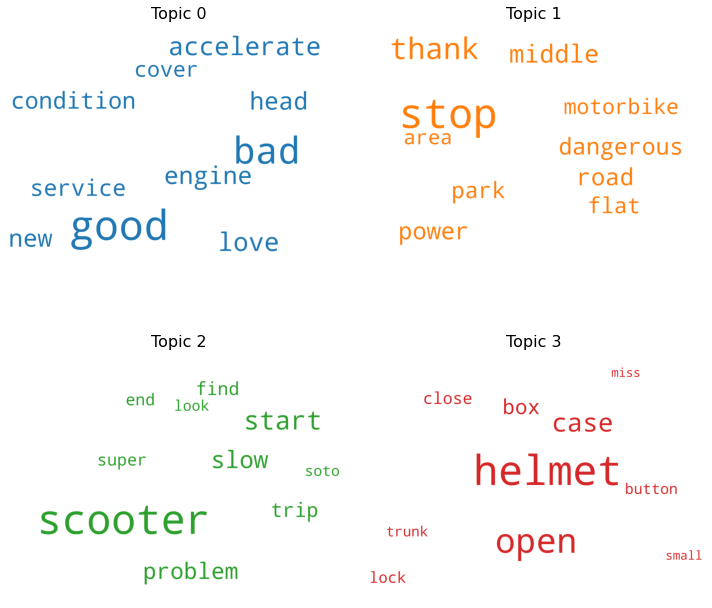

In [53]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()